# Final Exam (part 1) - Computational Physics I

### Deadline: Tuesday 10 December 2024 (by 17h00)
### Credits: 10 points

### Please keep the structure provided below and submit an organised notebook with clear answers to each item.

## Name: Vincent Noguera

In [1]:
#Import libraries:
#Python version used 3.9
import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv
import pandas as pd
import scienceplots
import os
import scipy.constants as cte
import glob


import sympy as sp
import scipy.optimize as opt

# To see the outputs in latex format
from sympy.interactive import printing
printing.init_printing(use_latex = True)


## 1. Symbolic algebra: sympy for physics (10 points) 

## 1.1. Lennard-Jones Potential and Forces (optimisation, 5 points)

The potential energy of a particle in a field has the form:

$$V(r) = 4\epsilon \left[ \left(\frac{\sigma}{r}\right)^{12} - \left(\frac{\sigma}{r}\right)^6 \right]$$

where $r$ is the distance between the particles, $\epsilon$ is the depth of the potential well describing the strength of the attraction, and $\sigma$ is the distance at which the potential energy is zero.




We research that the Lennard-Jones PPotential is used when is a molecule polarization, because it is depreciated when the Electromagnetic force is present
https://physics.stackexchange.com/questions/256747/why-does-the-lennard-jones-potential-fail-to-accurately-describe-forces-between

### (a) Create a python function to compute this potential $V(r)$ as a function of $r$ for fiducial values of $\epsilon$ and $\sigma$.

Then, create an appropriate vector for $r$ and plot this potential $V(r)$ versus $r$.



Data collected from: https://sci-hub.se/10.1016/j.jcis.2004.06.029

In [2]:
def potential(r, epsilon, sigma):
    v_pot = 4* epsilon * ( (sigma/r)**12 - (sigma/r)**6 )
    return v_pot

In [3]:
## define the r-vector for plotting:
r_gold = np.linspace(1e-20, 10, 500, endpoint=True)
## Define the variables epsilon and sigma:
sigma_gold = 2.57
epsilon_gold =  0.533649
v_pot = potential(r_gold,epsilon_gold, sigma_gold)


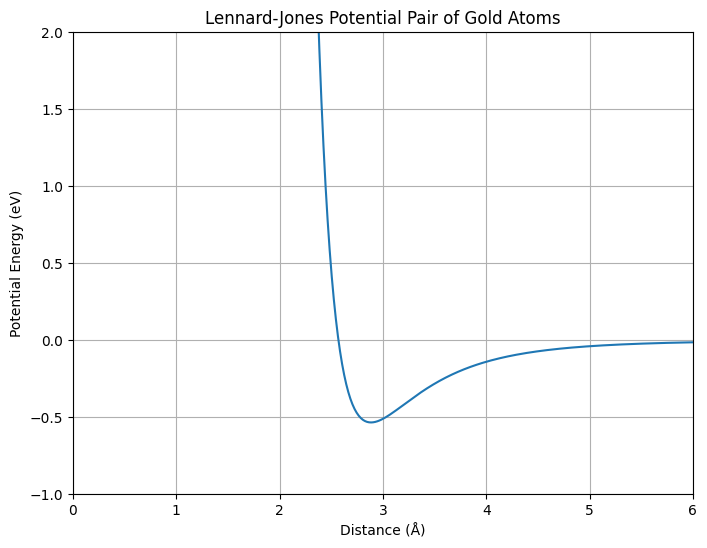

In [4]:
plt.figure(figsize=(8,6))

plt.plot(r_gold,v_pot)
plt.ylim(-1,2)
plt.xlim(0,6)
plt.grid()
plt.title("Lennard-Jones Potential Pair of Gold Atoms")
plt.xlabel("Distance (Å)")  
plt.ylabel("Potential Energy (eV)")
plt.show()

### (b) Use sympy to compute the force: $F(r)=-\frac{dV}{dr}$ experienced by a particle at a distance $r$.

Then, lambdify your expression and plot the $F(r)$ versus $r$.


In [5]:
#Define symbols:
r, epsilon, sigma = sp.symbols('r, epsilon, sigma')
# V(r):
V = potential(r, epsilon, sigma)
#Define the force:
force = - sp.diff(V, r)
#Lambdify:
force_lambd = sp.lambdify((r, epsilon, sigma), force, 'numpy')



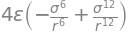

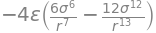

In [6]:
display(V)
display(force)

In [7]:
#Evaluate our solution for F(r)
f_axis = force_lambd(r_gold, epsilon_gold, sigma_gold)


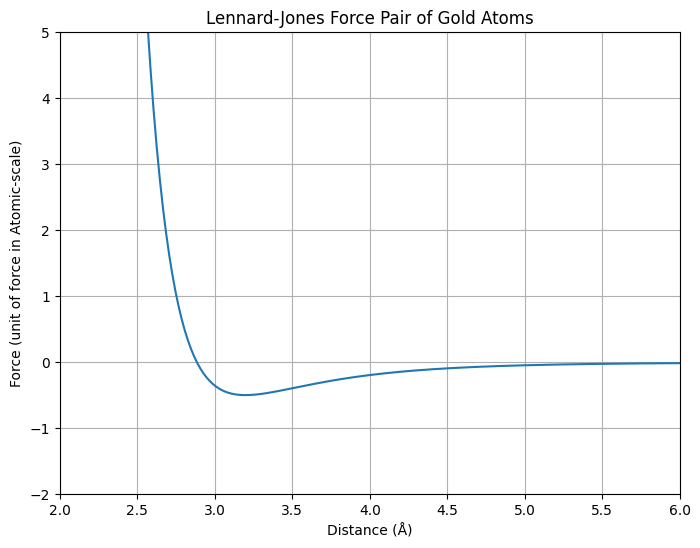

In [8]:
plt.figure(figsize=(8,6))

plt.plot(r_gold,f_axis)
plt.ylim(-2,5)
plt.xlim(2,6)
plt.title("Lennard-Jones Force Pair of Gold Atoms")

plt.xlabel("Distance (Å)")  # X-axis label (in Angstroms)
plt.ylabel("Force (unit of force in Atomic-scale)")
plt.grid()
plt.show()

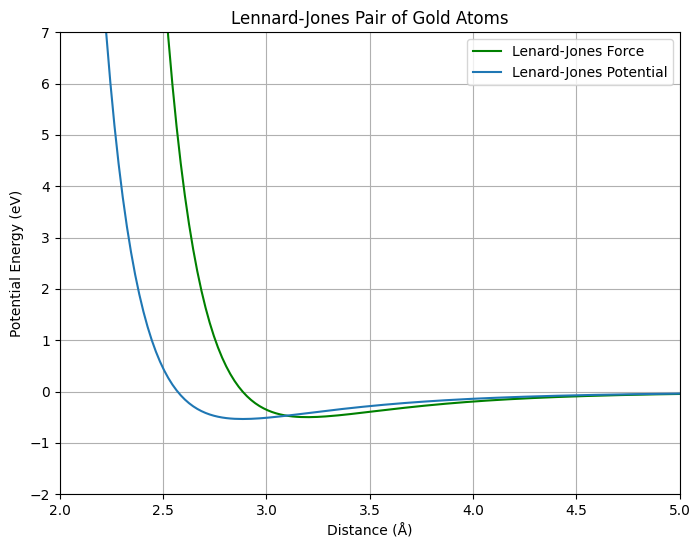

In [9]:
plt.figure(figsize=(8,6))

plt.plot(r_gold,f_axis, color="green", label="Lenard-Jones Force")
plt.plot(r_gold,v_pot, label="Lenard-Jones Potential")
plt.ylim(-2,7)
plt.xlim(2,5)
plt.title("Lennard-Jones Pair of Gold Atoms")
plt.xlabel("Distance (Å)")  # X-axis label (in Angstroms)
plt.ylabel("Potential Energy (eV)")
plt.legend()
plt.grid()
plt.show()


### (c) Find the maximum possible value of the attractive force, $F_{max}$, and the distance, $r_{max}$, at which the particle would be subjected to this force.


In [10]:
force_sub =  force.subs([(epsilon, epsilon_gold), (sigma, sigma_gold)])

force_deriv = sp.diff(force_sub, r)
# display(force_deriv)
lamb_force=sp.lambdify(r, force_deriv, "numpy")

# #Get the critical points:
max_min = opt.fsolve(lamb_force, 3)
# print(max_min)

print(f"Distance at maximum force (r_max): {max_min[0]} Å")

# #Replace the maximum value in 
max_force = force_sub.subs(r, max_min[0])


print(f"Maximum force (F_max): {max_force:.2e} unit force")
 


Distance at maximum force (r_max): 3.1982495048677073 Å
Maximum force (F_max): -4.98e-1 unit force


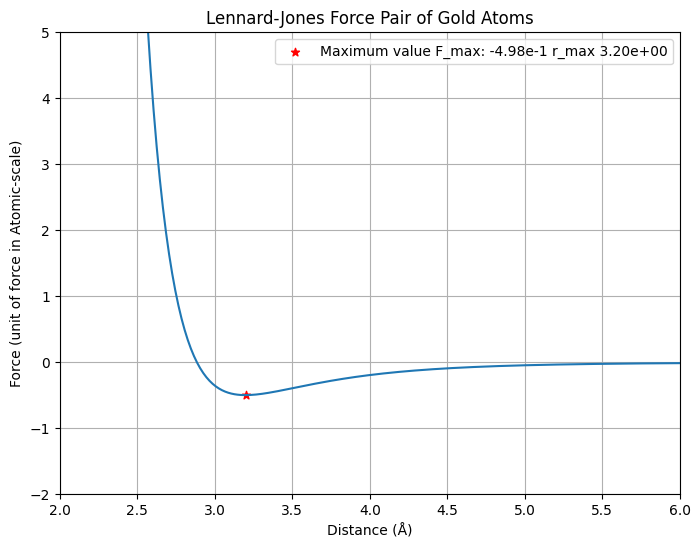

In [11]:
plt.figure(figsize=(8,6))

plt.plot(r_gold,f_axis)
plt.ylim(-2,5)
plt.xlim(2,6)
plt.title("Lennard-Jones Force Pair of Gold Atoms")
plt.scatter(3.2,-4.98e-1, marker="*", color="red", label=f"Maximum value F_max: {max_force:.2e} r_max {max_min[0]:.2e}")
plt.xlabel("Distance (Å)")  # X-axis label (in Angstroms)
plt.ylabel("Force (unit of force in Atomic-scale)")
plt.legend()
plt.grid()
plt.show()


#### Please provide your answers to these questions in a markdown cell:

(d) Describe the behavior of the potential at short and long distances.

At which "equilibrium" distance, $r_0$, does the force become zero?

(e) Discuss the physical significance of the Lennard-Jones potential in real-world systems (e.g. the meaning of $\sigma$ and $\epsilon$).

Provide 2 examples of systems where this potential is applicable.

At short distances, the potential tends to infinity, which means that the particles repel each other. At moderate distances, the potential reaches a minimum, and the particles start to attract each other. As the distance increases further, the potential approaches zero, indicating that the particles stop interacting.

source: https://en.wikipedia.org/wiki/Lennard-Jones_potential


$$ F=-\frac{dV}{dr} $$
It's happening when the Potential energy gets a maximum or a minimum, so we can evaluate as $F=0$
$$\frac{dV(r)}{dr} = 4\epsilon \left[ -12 \left( \frac{\sigma}{r} \right)^{13} + 6 \left( \frac{\sigma}{r} \right)^{7} \right]$$
$$-12 \left( \frac{\sigma}{r} \right)^{13} + 6 \left( \frac{\sigma}{r} \right)^{7} = 0$$
$$6 \left( \frac{\sigma}{r} \right)^{7} \left[ 2 \left( \frac{\sigma}{r} \right)^{6} - 1 \right] = 0$$
$$2 \left( \frac{\sigma}{r} \right)^{6} - 1 = 0$$
$$\left( \frac{\sigma}{r} \right)^{6} = \frac{1}{2}$$
$$r_0 = \sigma \left( 2 \right)^{1/6}$$

We can appreciate that it depends on the value of $\sigma$


It describes the interaction between the two particles that are going to be studied, where the x-axis is the distance between the particles, and the y-axis is the potential energy that one particle feels with respect to the other. $\epsilon$ represents the depth of the potential, which indicates the strength of the attraction that one particle feels due to the other. And $\sigma$ is proportional to the distance at which the force becomes zero, in addition to being related to the size of the atoms.


This process remains important in computational chemistry and physics, as it relates the attractive and repulsive forces between two particles. These interactions are often due to dipole-dipole interactions. The Lennard-Jones potential is used to describe a substance by simplifying realistic models, and it helps predict properties related to condensation and freezing. The interaction between hydrocarbons can be approximated using the Lennard-Jones potential.

Source: https://en.wikipedia.org/wiki/Lennard-Jones_potential#Applications

## 1.2. Population dynamics (solutions to ODEs, 5 points)

The **Verhulst-Pearl model** is used to study animal population dynamics. This model is also called **logistic growth model** and assumes that $P(t)$ satisfies the following ODE:


$$\frac{dP}{dt}=\alpha\,P\left(1-\frac{P}{\beta}\right)$$


where $\alpha$ is the growth rate and $\beta$ is the limiting size for the population (also called the environment carrying capacity).



### (a) Use sympy to find the general analytical solution to this ODE.



In [12]:
#Define symbols 

p = sp.symbols('p', cls = sp.Function)

t, alpha, beta= sp.symbols('t, alpha, beta')



In [13]:
#write the ODE

ver_pear_mod = sp.Eq(p(t).diff(t,1),alpha * p(t) * (1- p(t)/beta))

display(ver_pear_mod)

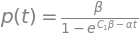

In [14]:
# Solve the ODE

sln_ver_pear_mod = sp.dsolve(ver_pear_mod)

display(sln_ver_pear_mod)

### (b) Imagine we use this equation to study the population dynamics of a bird species re-introduced into nature, knowing that the test environment can only host $20$ individuals. We liberate $10$ individuals of this species in the wild, and we know that the growth rate is $0.2$ individuals per month. Rewrite and recompute both the ODE and its solution for this set of conditions.



In [15]:
#define the variables:
alpha = 0.2
beta = 20
#write the ODE

ver_pear_mod_eval = sp.Eq(p(t).diff(t,1),alpha * p(t) * (1- p(t)/beta))

display(ver_pear_mod_eval)

In [16]:
# Solve the ODE

sln_ver_pear_mod_eval = sp.dsolve(ver_pear_mod_eval, ics={p(0):10})

display(sln_ver_pear_mod_eval)
print(sln_ver_pear_mod_eval)

Eq(p(t), -20.0/(-1.0 - 1.0*exp(-0.2*t)))


### (c) Lambify your expression, make a plot of the analytical solution and label it appropriately.


In [17]:
#Lambdify:
func = sp.lambdify(t, sln_ver_pear_mod_eval.rhs, 'numpy')
display(func)
print(func)

<function _lambdifygenerated(t)>

<function _lambdifygenerated at 0x7f94881e5550>


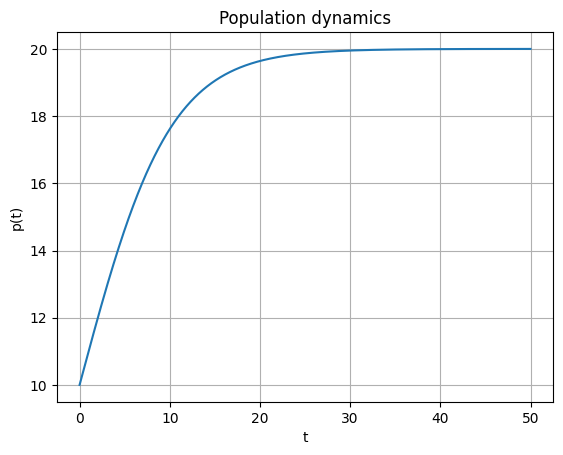

In [18]:

## define the r-vector for plotting:
# t = np.linspace(.1, .5, 10000, endpoint=True)
t= np.arange(0,50,0.01)


#Evaluate our solution for F(r)
p_axis = func(t)

#Plot:
plt.plot(t, p_axis)
plt.xlabel('t')
plt.ylabel('p(t)')
plt.title('Population dynamics')
plt.grid(True)
plt.show()



#### Please provide your answers to these questions in a markdown cell:

(d) Briefly comment on the behavior of the population size over time, and the eventual population size as $t \to \infty$.

What are the biological interpretations of the parameters $\alpha$ and $\beta$ ? 

(e) Why does the population growth slow down as $P(t)$ approaches $\beta$ ?

How might the model change if external factors (e.g., predators, diseases, or resource scarcity) are introduced?

Due to the enviroment can host only twenty this is the maximum value that want to reach generating an asyntota, an mantaining it in the time.
The parameter $\alpha$ have a meaning about the rate of growth of the population, growting in this case as the 20% of the population for month, and the $\beta$ parameter indicates that the population can not growth more than that, limiting the number of species in that site due to the capacity or conditions of the environment.

Due to we are almost in the maximum capacity of the environment this will not provide more growth of the specie so, the quantity as cannot be overate and the growth of the specie is the same this will affect that mantain this slope of the beggining.

we will have to include another variables to explain how much species are affected by external variables, due to this could affect directly the growth rate of the specie or can be included in the equation. Checking that if the specie is haunted we can reduce directly it's growth rate as a mean, or if the resource scarcity this will reduce the environment carrying capacity, or for the case of a disease as another variable that can happen after some time and reducing the growting of the speecie